## Research question: ``How well did different forms of government (based on the Polity index) handle COVID-19? Sub-questions: which type handled it the best/worst? Is there a relationship between the handling of cases and how democratic a country is?``  

## Refining Data

In [4]:
# read in & prepare data for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

population_data = pd.read_csv('./population_by_country_2020.csv', index_col=0)

global_data = pd.read_csv('./time_series_covid19_confirmed_global.csv', index_col=1)
global_data = global_data.drop(['Province/State', 'Lat', 'Long'], axis=1).T
global_data = global_data.groupby(level=0, axis=1).sum()
global_data = global_data[(pd.to_datetime(global_data.index.to_series()).dt.month >= 3)]

my_data = pd.DataFrame()

# Add data for established countries to their respective classifications based 
# on the polity score

my_data['Full Democracy'] = (global_data['Norway']/population_data.at['Norway', 'Population'] +
                             global_data['Iceland']/population_data.at['Iceland', 'Population'] + 
                             global_data['Sweden']/population_data.at['Sweden', 'Population'] +
                             global_data['Canada']/population_data.at['Canada', 'Population'] +
                             global_data['Australia']/population_data.at['Australia', 'Population']
                            )*1000/5

my_data['Democracy'] = (global_data['US']/population_data.at['United States', 'Population'] +
                        global_data['Brazil']/population_data.at['Brazil', 'Population'] +
                        global_data['France']/population_data.at['France', 'Population'] +
                        global_data['India']/population_data.at['India', 'Population'] + 
                        global_data['Argentina']/population_data.at['Argentina', 'Population']
                       )*1000/5

my_data['Open Anocracy'] = (global_data['Russia']/population_data.at['Russia', 'Population'] +
                            global_data['Ukraine']/population_data.at['Ukraine', 'Population'] + 
                            global_data['Algeria']/population_data.at['Algeria', 'Population'] +
                            global_data['Colombia']/population_data.at['Colombia', 'Population'] +
                            global_data['Congo (Kinshasa)']/population_data.at['Congo', 'Population']
                           )*1000/5

my_data['Closed Anocracy'] = (global_data['Turkey']/population_data.at['Turkey', 'Population'] +
                              global_data['Egypt']/population_data.at['Egypt', 'Population'] +
                              global_data['Afghanistan']/population_data.at['Afghanistan', 'Population'] +
                              global_data['Thailand']/population_data.at['Thailand', 'Population'] +
                              global_data['Ethiopia']/population_data.at['Ethiopia', 'Population']
                             )*1000/5

my_data['Autocracy'] = (global_data['Belarus']/population_data.at['Belarus', 'Population'] +
                        global_data['Cuba']/population_data.at['Cuba', 'Population'] +
                        global_data['Saudi Arabia']/population_data.at['Saudi Arabia', 'Population'] +
                        global_data['Iran']/population_data.at['Iran', 'Population'] +
                        global_data['China']/population_data.at['China', 'Population']
                       )*1000/5

# There are only 3 failed states in the world at the moment, hence only three sets
my_data['Failed States'] = (global_data['Libya']/population_data.at['Libya', 'Population'] +
                            global_data['Yemen']/population_data.at['Yemen', 'Population'] +
                            global_data['South Sudan']/population_data.at['South Sudan', 'Population']
                           )*1000/3

my_data.index = pd.to_datetime(my_data.index.to_series())
my_data

,Full Democracy,Democracy,Open Anocracy,Closed Anocracy,Autocracy,Failed States
2020-03-01,0.003072,0.000419,0.000007,0.000129,0.013444,0.000000
2020-03-02,0.005187,0.000619,0.000018,0.000132,0.014721,0.000000
2020-03-03,0.008716,0.000675,0.000031,0.000132,0.016722,0.000000
2020-03-04,0.019093,0.000956,0.000063,0.000132,0.018238,0.000000
2020-03-05,0.025457,0.001280,0.000065,0.000146,0.019686,0.000000
...,...,...,...,...,...,...
2020-09-15,4.412286,12.703552,5.671048,1.216923,4.516428,1.268016
2020-09-16,4.434797,12.857174,5.724621,1.222910,4.532827,1.306441
2020-09-17,4.462070,13.019977,5.780970,1.228387,4.548667,1.349504
2020-09-18,4.494089,13.193839,5.831272,1.233933,4.565611,1.379637


**Datasets used**  
  
1. ``time_series_covid19_confirmed_global``
2. ``https://www.kaggle.com/tanuprabhu/population-by-country-2020 (dataset with the population and general stats about every country)``
3. ``https://en.wikipedia.org/wiki/Polity_data_series (dataset with polity scores for every country in 2018)``

## Visualization

Text(2020-04-14, 9.25, 'PS* = 10\n6 <= PS < 10\n0 <= PS < 6\n-5 <= PS < 0\n-10 <= PS < -5\nPS = N/A')

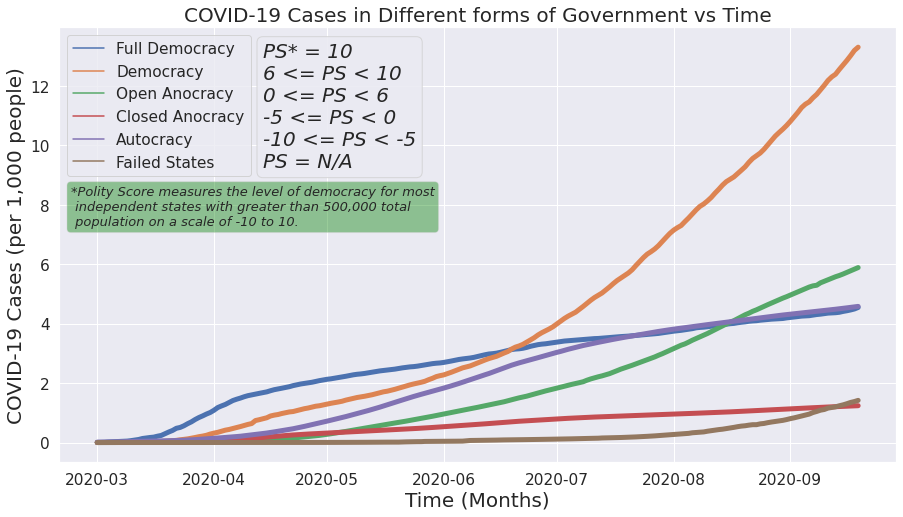

In [5]:
# Create a visualization
sns.set_theme()
sns.set_style("dark")

# Plot a line graph, add appropriate legends, labels, and text to the plot
sns.set(rc={'figure.figsize': (15, 8)}, font_scale = 1.4)
ax = sns.lineplot(data = my_data, dashes = False, linewidth = 5)
ax.set_xlabel('Time (Months)',fontsize=20)
ax.set_ylabel('COVID-19 Cases (per 1,000 people)',fontsize=20)
ax.set_title('COVID-19 Cases in Different forms of Government vs Time', fontsize=20)
ax.text(x = '2020-02-23', y = 7.3, fontsize = 13, s = '*Polity Score measures the level of democracy for most\n independent states with greater than 500,000 total\n population on a scale of -10 to 10.', style='italic', 
        bbox={'facecolor':'green', 'edgecolor': '#d3d3d4', 'alpha':0.4, 'boxstyle':'round'})
ax.text(x = '2020-04-14', y = 9.25, fontsize=20, s = 'PS* = 10\n6 <= PS < 10\n0 <= PS < 6\n-5 <= PS < 0\n-10 <= PS < -5\nPS = N/A', style='italic', 
        bbox={'facecolor':'#eaeaf2', 'edgecolor': '#d3d3d4', 'alpha':0.9, 'boxstyle':'round'})

I chose a line graph for my visualization because I think it's easy to interpret growth with it, COVID-19 confirmed cases in this context. I also added labels and a brief description for types of governments and the polity score for better understanding of how the data is classified.

I chose a light grey grid background so it's easy to calculate the number of cases per 1000 at any point on the graph.

I also chose the time to be measured in months and cases in infected per 1000 to make it easier for people to understand the numbers and the timeline.

I chose different colors to depict different forms of government. Although they're measured through the Polity score and can be visualized with shades of the same color, I chose for them to be different, because it is more important to understand how they're different than how they're similar.

Through this visualization, I'm trying to communicate the result of the different forms of governments' handling of COVID-19. We can make observations such as, on average so far, Democracies have handled the pandemic comparatively worse than the other forms of governments.

The benefits of this visualization include:
- predicting performance in a **similar** future pandemic based on government type.
- learning how to handle situations better from the types of rules different governments implemented. i.e. Autocratic and Failed governments have significantly less people travelling in and out of the countries, indicating that an early travel ban might result in better handling.

There are some donwsides to this visualization, for example accounting for outliers in the type of government, although in this case, there were no significant outliers within a form of government. Another downside could be inaccurate representation due to underlying factors. For example, if there was a reason completely unrelated to the type of government which significantly impacted the behaviour of the cases, it would need to be accounted for.